In [1]:
import os

base_folder_path = r"C:\Users\amoks\Desktop\Year 3\Final year project\archive2\Dataset"

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = os.path.join(base_folder_path, "Train/Train/Healthy")
train_files_powdery = os.path.join(base_folder_path, "Train/Train/Powdery")
train_files_rust = os.path.join(base_folder_path, "Train/Train/Rust")

test_files_healthy = os.path.join(base_folder_path, "Test/Test/Healthy")
test_files_powdery = os.path.join(base_folder_path, "Test/Test/Powdery")
test_files_rust = os.path.join(base_folder_path, "Test/Test/Rust")

valid_files_healthy = os.path.join(base_folder_path, "Validation/Validation/Healthy")
valid_files_powdery = os.path.join(base_folder_path, "Validation/Validation/Powdery")
valid_files_rust = os.path.join(base_folder_path, "Validation/Validation/Rust")

print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powdery images in training set:", total_files(train_files_powdery))
print("Number of rust images in training set:", total_files(train_files_rust))

print("Number of healthy leaf images in test set:", total_files(test_files_healthy))
print("Number of powdery images in test set:", total_files(test_files_powdery))
print("Number of rust images in test set:", total_files(test_files_rust))

print("Number of healthy leaf images in validation set:", total_files(valid_files_healthy))
print("Number of powdery images in validation set:", total_files(valid_files_powdery))
print("Number of rust images in validation set:", total_files(valid_files_rust))


Number of healthy leaf images in training set: 458
Number of powdery images in training set: 430
Number of rust images in training set: 434
Number of healthy leaf images in test set: 50
Number of powdery images in test set: 50
Number of rust images in test set: 50
Number of healthy leaf images in validation set: 20
Number of powdery images in validation set: 20
Number of rust images in validation set: 20


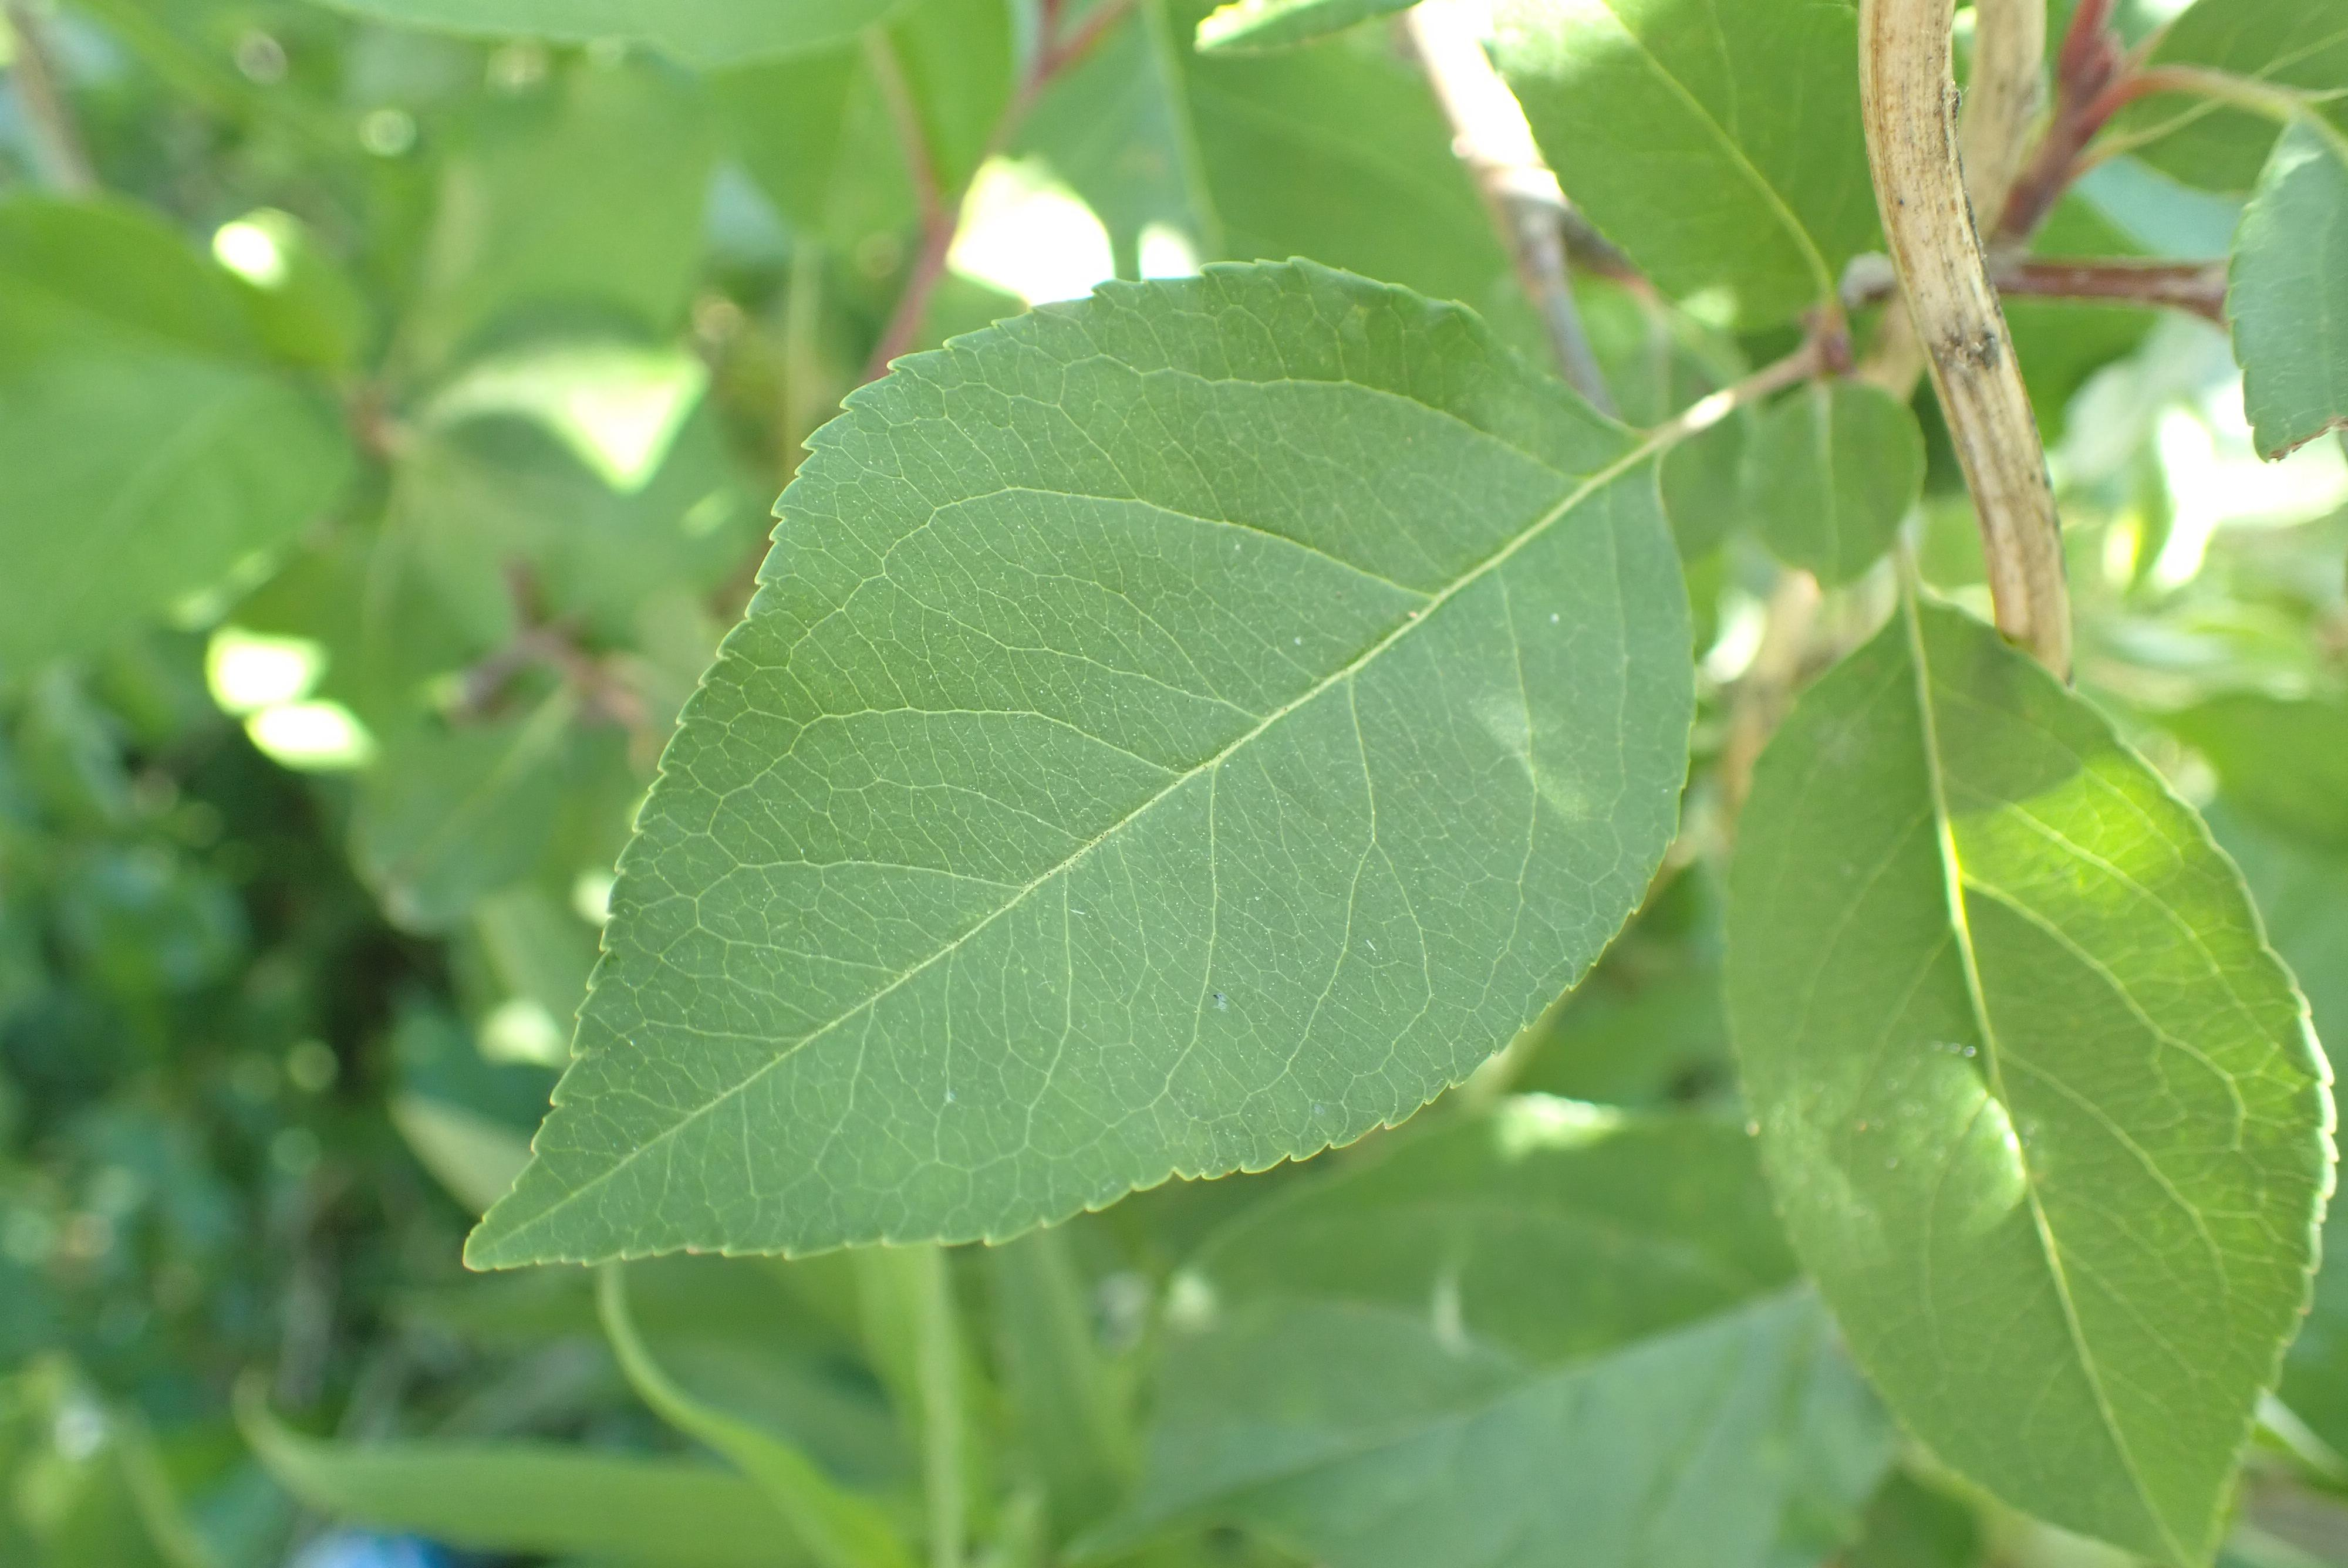

In [2]:
from PIL import Image
import IPython.display as display

image_path =r"C:\Users\amoks\Desktop\Year 3\Final year project\archive2\Dataset\Train\Train\Healthy\8bf87605d2b3a323.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

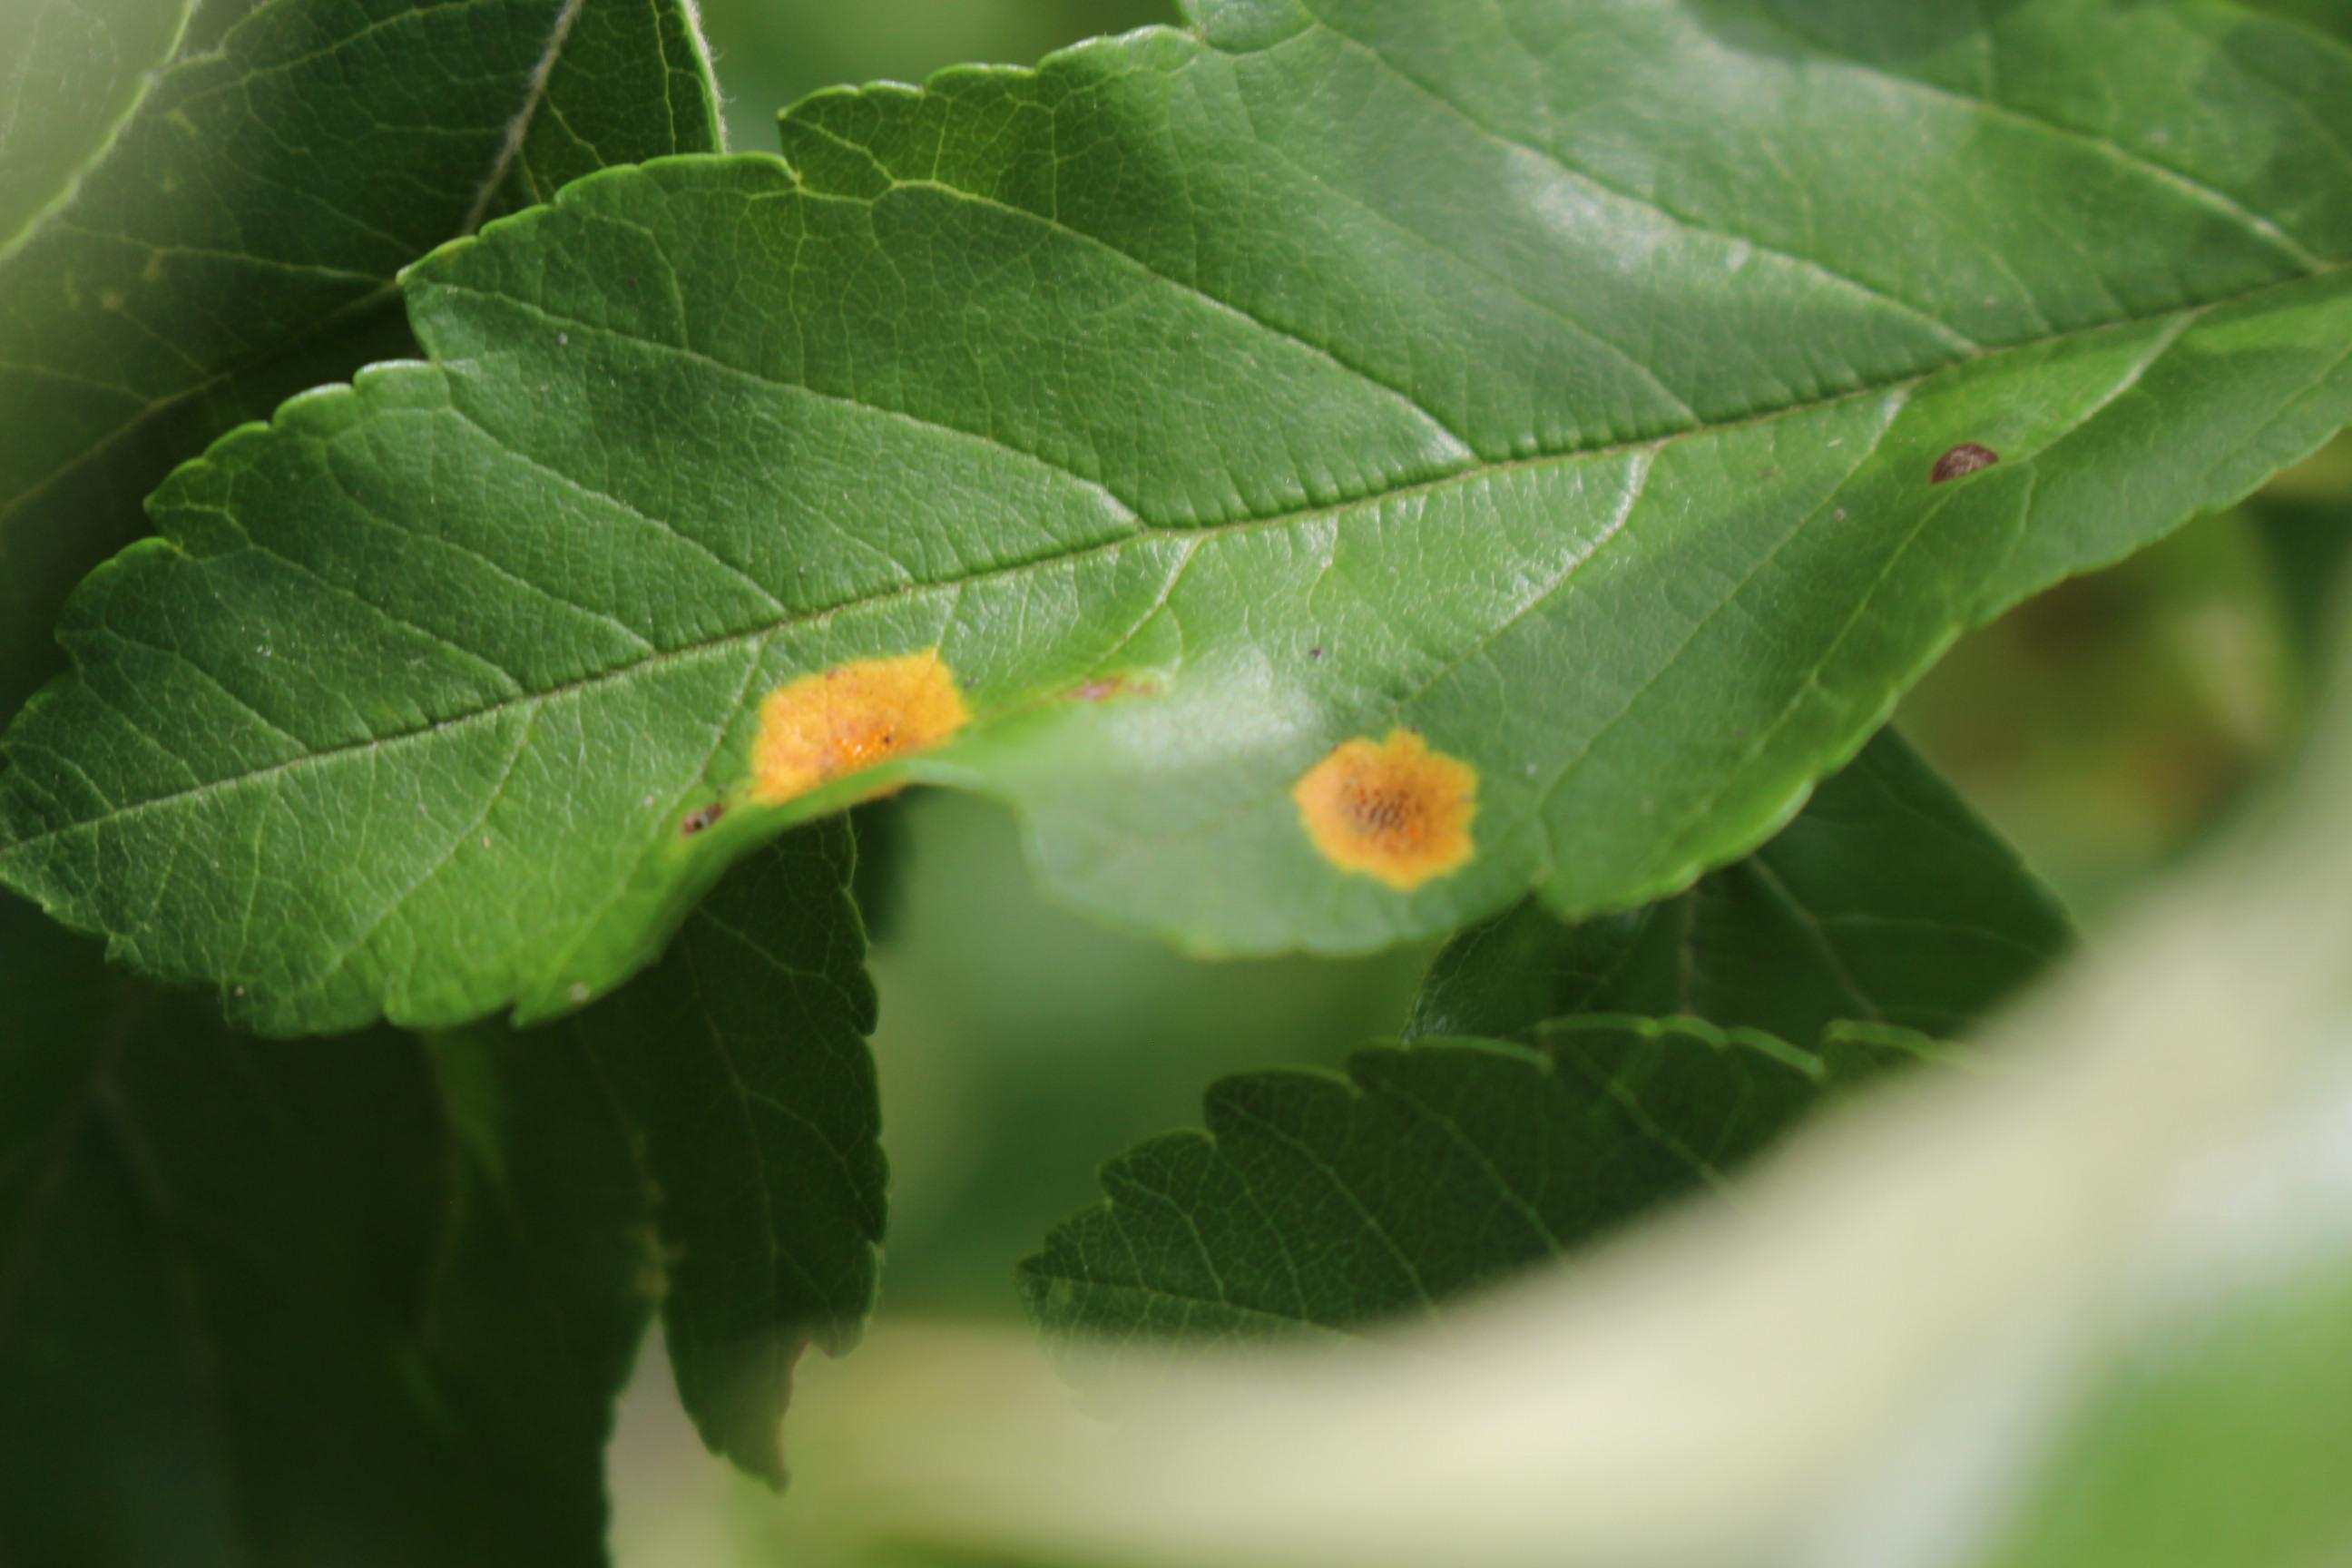

In [3]:
image_path=r"C:\Users\amoks\Desktop\Year 3\Final year project\archive2\Dataset\Train\Train\Rust\8c539728dbb64bd0.jpg"

with open (image_path,'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:
#data argumentation done using imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_data=os.path.join(base_folder_path, "Train/Train")
validation_data=os.path.join(base_folder_path, "Validation/Validation")

train_generator= train_datagen.flow_from_directory(train_data, target_size=(225,225), batch_size=32, class_mode='categorical')
validation_generator= test_datagen.flow_from_directory(validation_data, target_size=(225,225), batch_size=32, class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\amoks\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#training the model
history=model.fit(train_generator, batch_size=16, epochs=5, validation_data=validation_generator,validation_batch_size=16)

Epoch 1/5


c:\Users\amoks\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4163 - loss: 2.7061 - val_accuracy: 0.7167 - val_loss: 0.6620
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7605 - loss: 0.5579 - val_accuracy: 0.8167 - val_loss: 0.4060
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8985 - loss: 0.3068 - val_accuracy: 0.8167 - val_loss: 0.4706
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9192 - loss: 0.2151 - val_accuracy: 0.8167 - val_loss: 0.4766
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9492 - loss: 0.2187 - val_accuracy: 0.9000 - val_loss: 0.4009


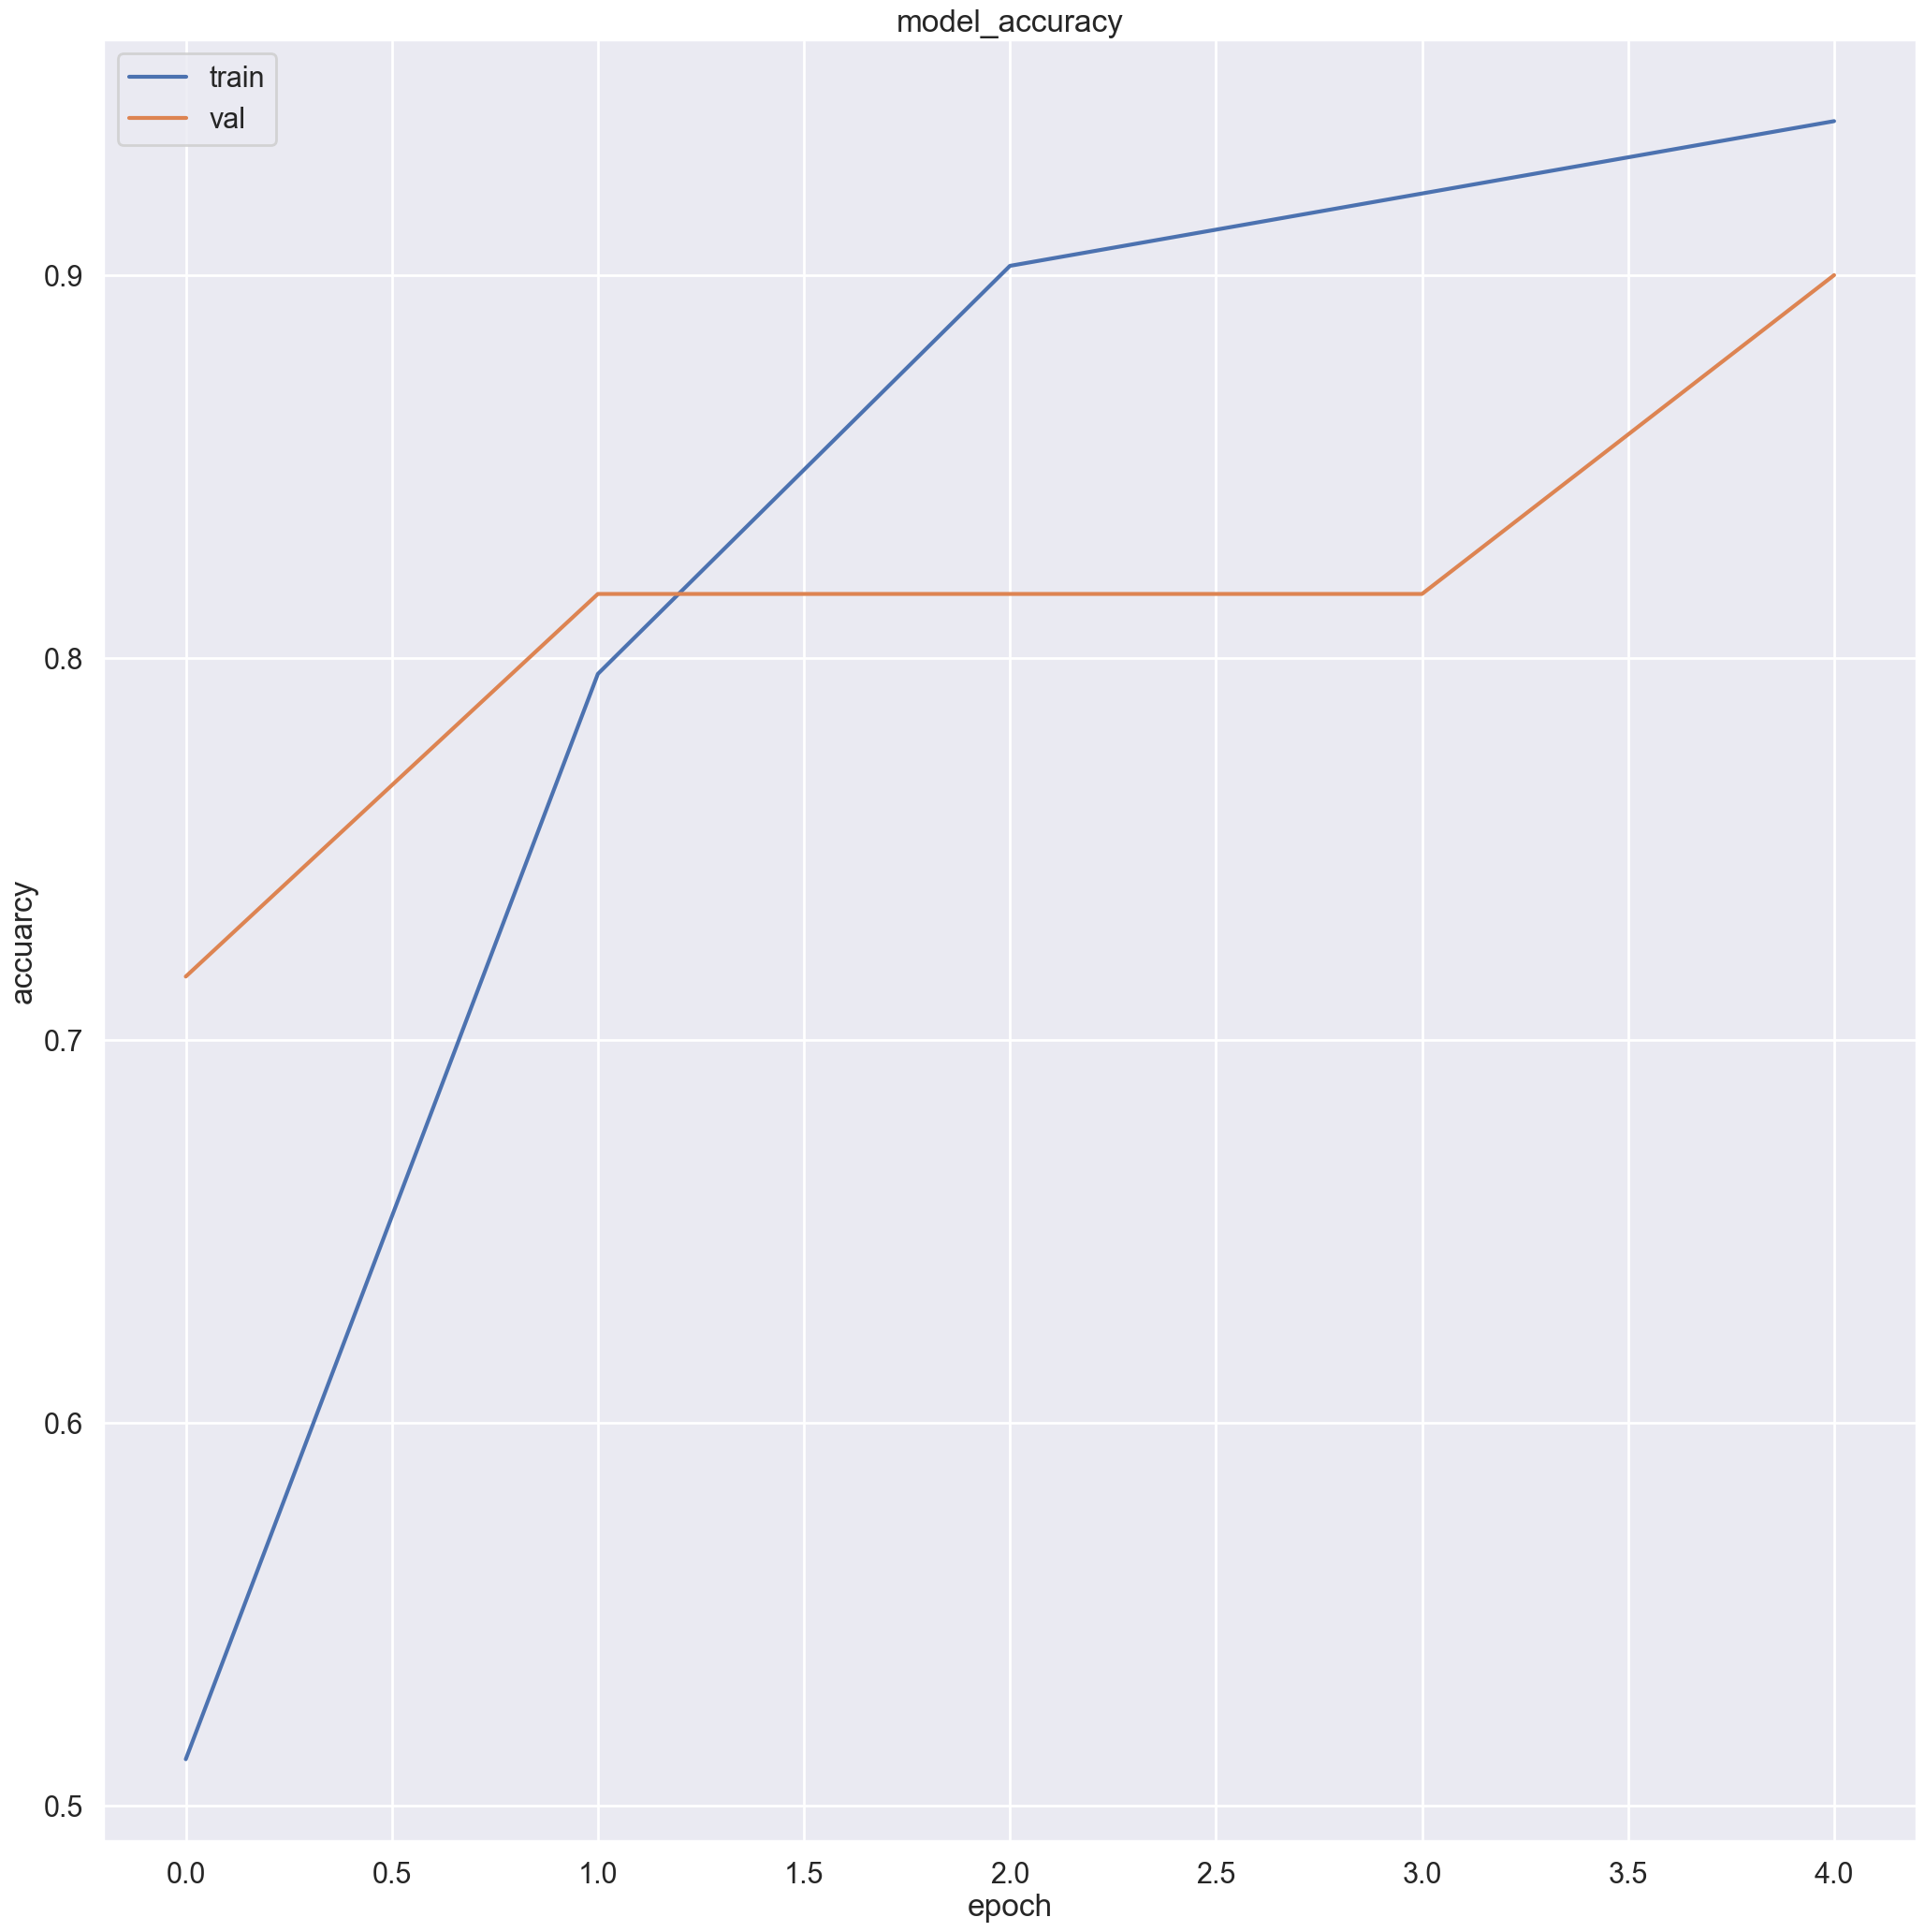

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25,25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.save("model.h5")

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225,225)):
    img = load_img(image_path, target_size=target_size)
    x= img_to_array(img)
    x=x.astype('float32')/255.
    x=np.expand_dims(x, axis=0)
    return x

x=preprocess_image(r"C:\Users\amoks\Desktop\Year 3\Final year project\archive2\Dataset\Test\Test\Rust\84d7fe5c7c0c43c2.jpg")

In [12]:
def simulate_sensor_data():
    temperature= np.random.uniform(10.35)
    humidity=np.random.uniform(30)
    ph_value=np.random.uniform(5,9)
    return temperature, humidity, ph_value

In [13]:
def provide_recommendations(temp, humidity, ph):
    recommendations=[]
    ##Powdery mildew preventions
    if temp>30 or temp<15:
        recommendations.append("Temperature is favorable to prevent powdery mildew.")
    else:
        recommendations.append(f"Adjust temperature to below 15c or above 30 to prevent powder mildew. The current tempersature is {temp:.2f}")
        
    if humidity<=50:
        recommendations.append("Humidity is favorable to prevent powdery mildew.")
    else:
        recommendations.append(f"Adjust humidity to below 50% to prevent powder mildew. The current humidity is { humidity:.2f}%")

    if ph == 6.4:
        recommendations.append("pH is favorable to prevent powdery mildew.")
    else:
        recommendations.append("Adjust pH to 6.4 to prevent powder mildew. The current pH is; ")

    ##Plant rust recommendations
    if temp<10 or temp>15:
        recommendations.append("Temperature is favorable to prevent rust.")
    else:
        recommendations.append("Adjust temperature to below 10c or above 15c to prevent rust. The current temperature is ")

    if 60<= humidity <= 70:
        recommendations.append("Humidity is favorable to prevent rust.")
    else:
        recommendations.append("Adjust humidity to between 60% to 70% to prevent rust. The current humidity level is; ")

    if ph == 8:
        recommendations.append("pH is favorable to prevent rust.")
    else:
        recommendations.append("Adjust pH to 8 to prevent rust. The current pH is; ")
    
    return recommendations

In [14]:
predictions=model.predict(x)
predicted_class= np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [15]:
labels=train_generator.class_indices
labels={v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [16]:

predicted_label=labels[predicted_class]
temp,humidity, ph= simulate_sensor_data()
recommendations=provide_recommendations(temp, humidity, ph)

print("Predicted Disease:", predicted_label)
print("Recommendations:")
for rec in recommendations:
    print(rec)

Predicted Disease: Rust
Recommendations:
Temperature is favorable to prevent powdery mildew.
Humidity is favorable to prevent powdery mildew.
Adjust pH to 6.4 to prevent powder mildew. The current pH is; 
Temperature is favorable to prevent rust.
Adjust humidity to between 60% to 70% to prevent rust. The current humidity level is; 
Adjust pH to 8 to prevent rust. The current pH is; 
